# Configuración Inicial

In [2]:
import pandas as pd
import os
import pandas as pd
#import sqlalchemy
import numpy as np

from utils import *

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [3]:
data_path = os.getcwd() + "//Datos" #Definir ruta de búsqueda
df1= pd.read_excel(data_path + "//Datos 2014.xls", skiprows=1, engine='xlrd')
df2 = pd.read_excel(data_path + "//Datos 2018.xls", skiprows=1, engine='xlrd')
df3 = pd.read_excel(data_path + "//Datos 2022.xls", skiprows=1, engine='xlrd')
        
#check_data(df1, df2, df3)

columns = [val for val in mapper_3.values()] #Crear lista con nombres a utilizar en el dataframe
df = pd.DataFrame(columns=columns)   #Crea dataframe vacío con líneas definidas antes

for i, item in enumerate(zip([df1,df2,df3], [2014,2018,2022])):
    year = item[1]
    try:
        item[0].drop(0, inplace=True)
    except:
        None
        
    item[0].loc[:,"Año"] = year
    item[0].rename(mapper=mapper_3, axis=1, inplace=True) #Unir archivos
    
    df = pd.concat([df, item[0]])
    df.reset_index(drop=True, inplace=True)  
#Cambio formato
df["Codigo"] = df["Codigo"].astype(str).str.zfill(5)
df["Codigo Region"] = df["Codigo"].str[:2]
df["Codigo Provincia"] = df["Codigo"].str[:3]
df["Region"] = df["Codigo Region"].replace(to_replace=region_dict)
#Transformación a dato numérico
for col in df.columns:
    if col[:3] == "IAD" or col[:3] == "BGM":
        df[col] = pd.to_numeric(df[col], downcast="float", errors="coerce")

#df.head()

In [4]:
for col in ['IDA', 'IDAxCDyPC', 'IDAxIT', 'IT', 'IFCM', 'IP',
       'IPP', 'GC', 'GBySC', 'GT', 'GSC', 'GFCM', 'GP', 'CA', 'CASC', 'CE',
       'CESC', 'DAyV', 'DAC', 'GAP', 'GJC', 'GJDM', 'GJ', 'GST', 'GS', 'TFCM']:
    df[col] = pd.to_numeric(df[col], downcast="float", errors="coerce")

#df.head()

In [5]:
#Definición de variables
df["Gasto asociado a IT"] = df['CASC'] + df['CESC'] + df['GAP']+ df['GJC']
df["%IT_en_IPP"] = 100.0*df['IT']/df['IPP']
df["%IT_en_GC"] = 100.0*df['IT']/df['GC']
df["%IT_en_GT"] = 100.0*df['IT']/df['GT']
df["%IT_ en_Gasto asociado a IT"] = 100.0*df['IT']/df['Gasto asociado a IT']
df["DDAA"] = df["IDA"] + df["IDAxIT"]+ df["IDAxCDyPC"]
df["GDA"]= df["DAyV"] + df["DAC"]
df["%DA_en_IPP"] = 100.0*df["DDAA"]/df['IPP']
df["balance_DDAA"] = df["DDAA"] - df["GDA"]
#df

In [6]:
fields_Region = ["Año", "Region","%IT_en_IPP","Gasto asociado a IT","%IT_en_GC","%IT_en_GT","%IT_ en_Gasto asociado a IT",
          "DDAA","GDA","%DA_en_IPP","balance_DDAA"]
fields_Comuna = ["Año", "Region","Municipio","%IT_en_IPP","Gasto asociado a IT","%IT_en_GC","%IT_en_GT","%IT_ en_Gasto asociado a IT",
          "DDAA","GDA","%DA_en_IPP","balance_DDAA"]
df_group_region = df[fields_Region].groupby(by=["Año","Region"]).mean(numeric_only=True).round(1)
df_group_comuna = df[fields_Comuna].groupby(by=["Año","Region", "Municipio"]).mean(numeric_only=True).round(1)


# Balance DDAA

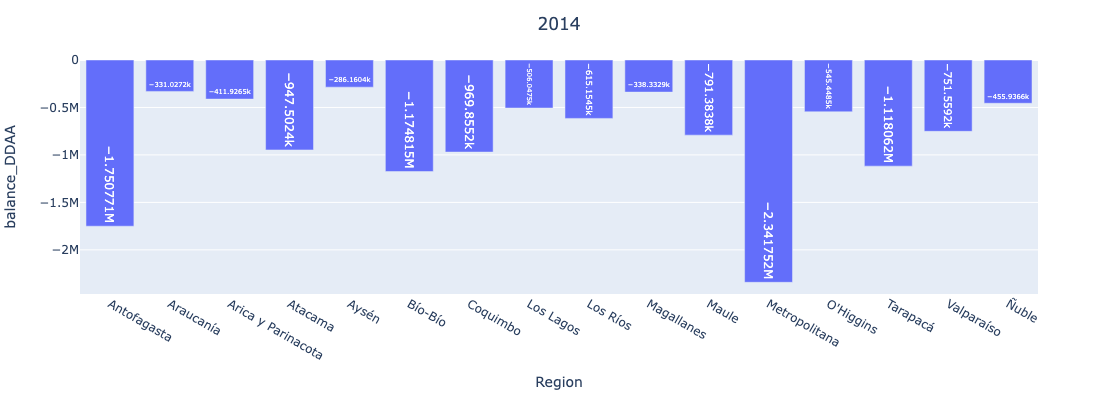

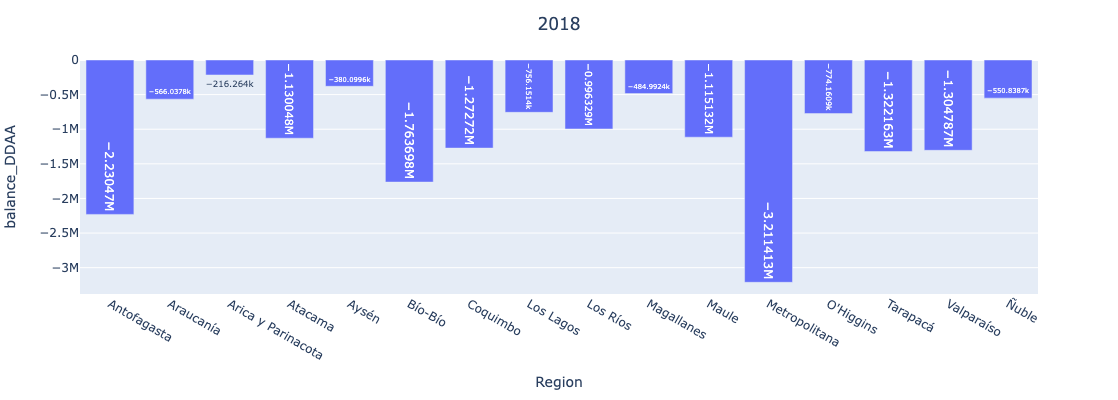

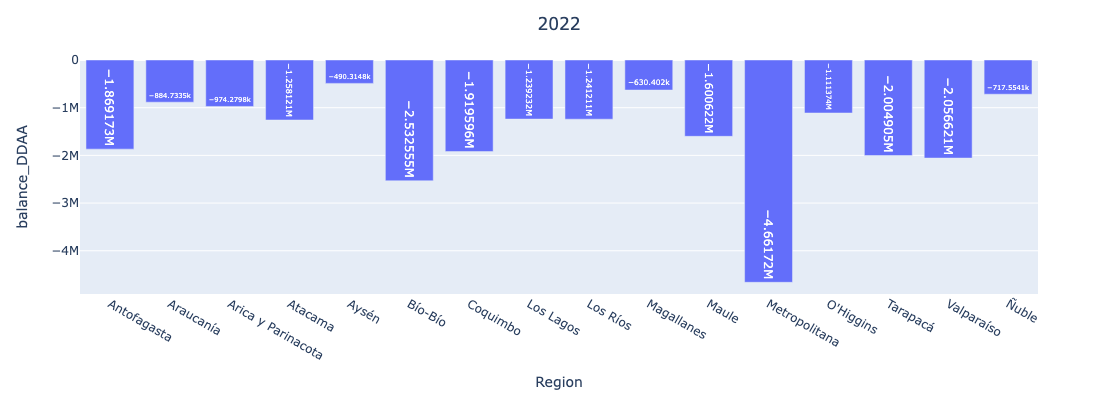

In [15]:
target = "balance_DDAA"
for year in [2014, 2018, 2022]:
    df_to_plot = df_group_region.loc[year].reset_index(drop=False)
    fig = px.bar(df_to_plot, x="Region", y= target, text_auto=True)
    fig.update_layout(title=dict(text=f"{year}", x=0.5, xanchor="center"),
                     height=400)
    fig.show()

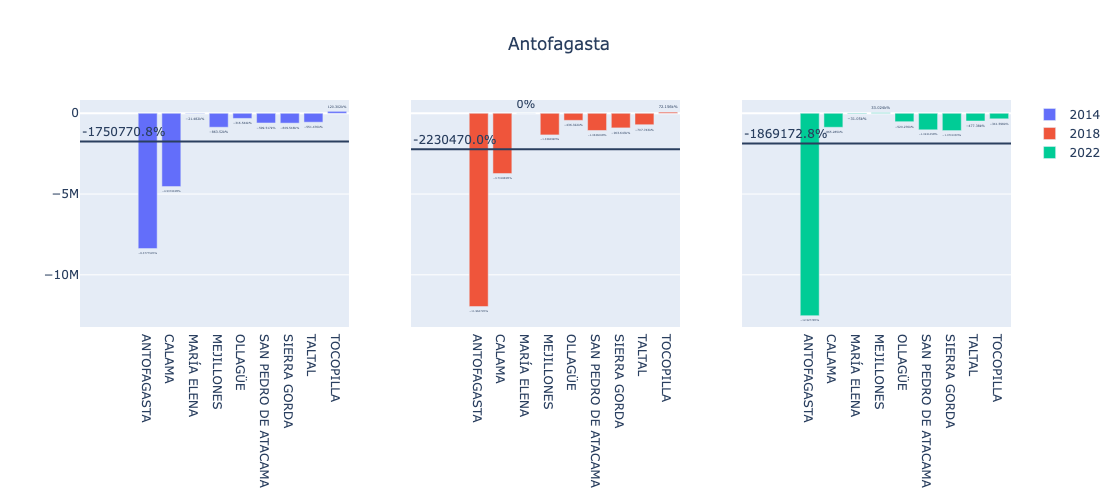

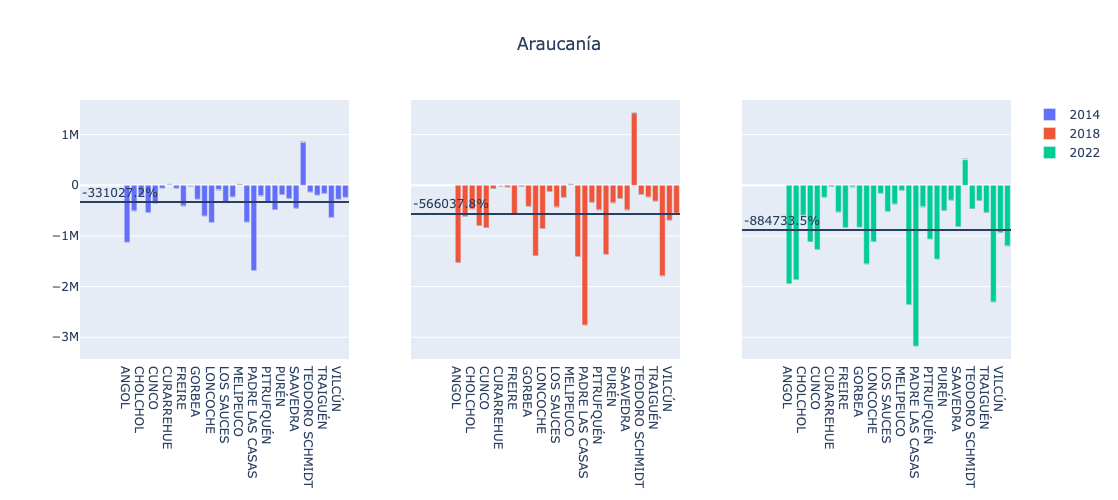

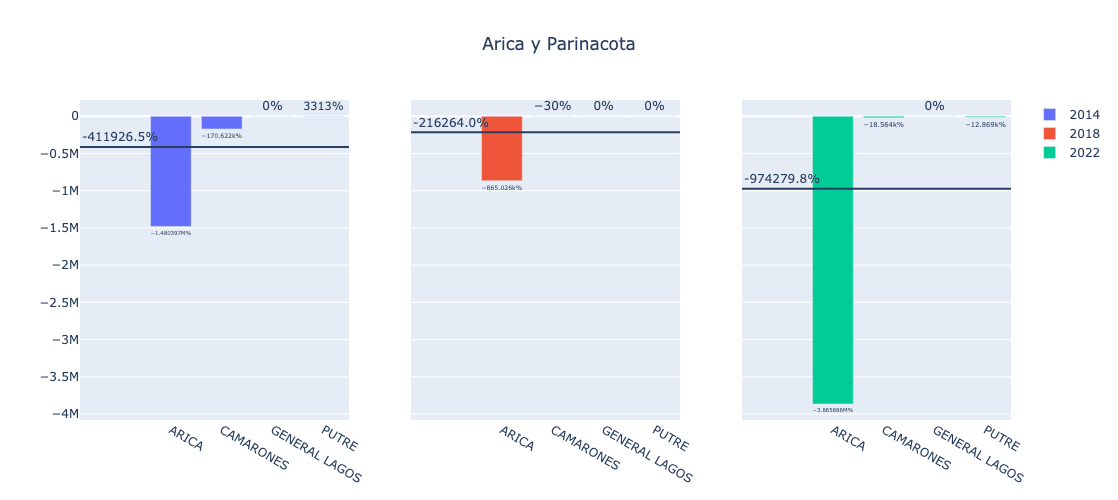

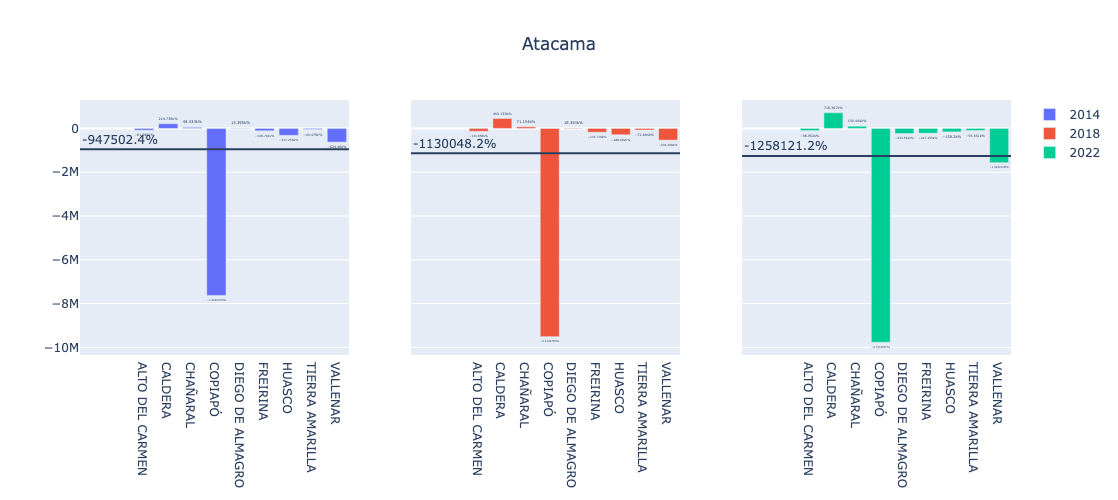

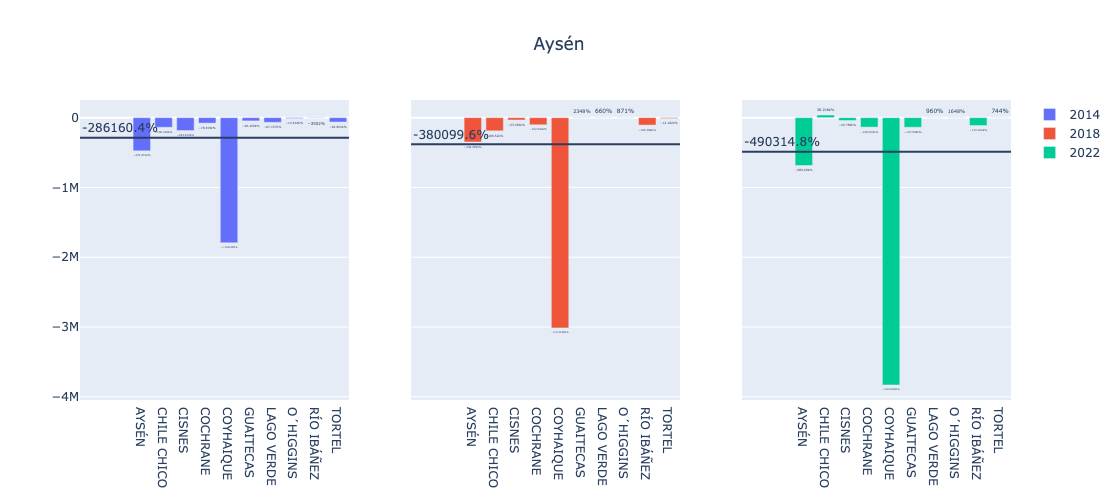

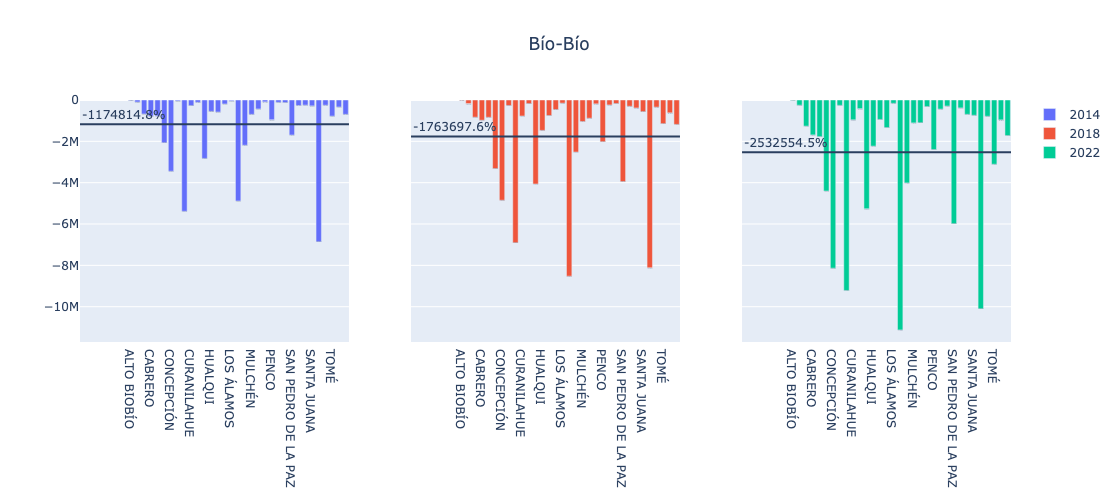

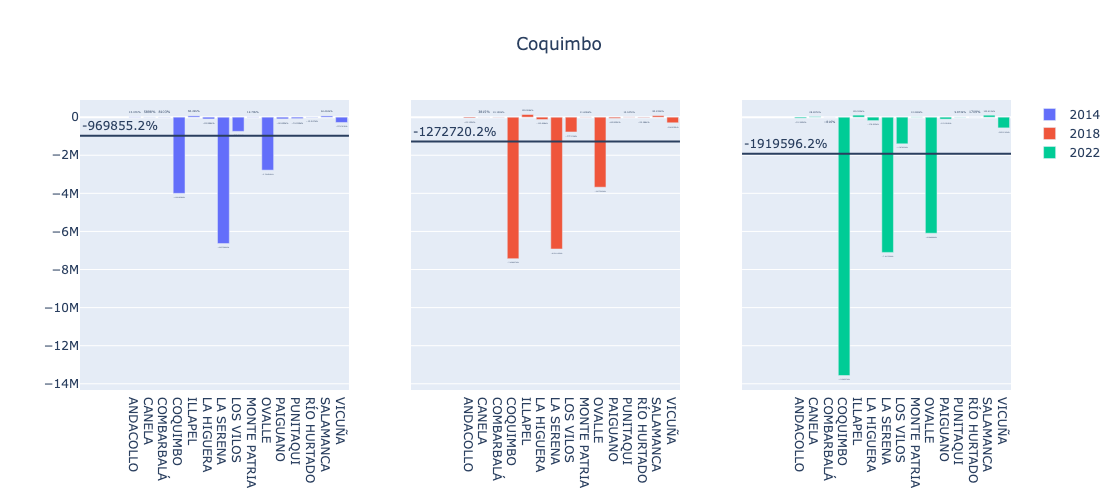

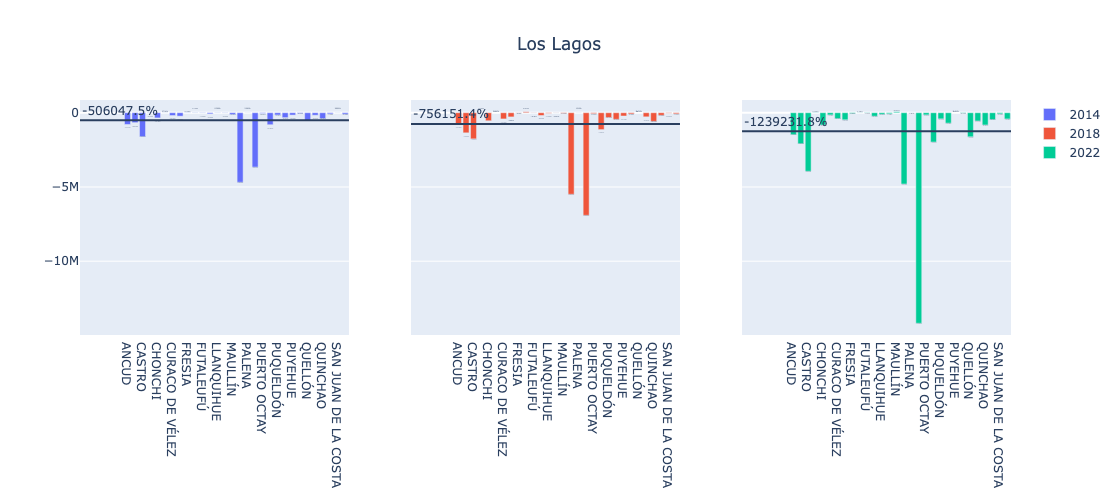

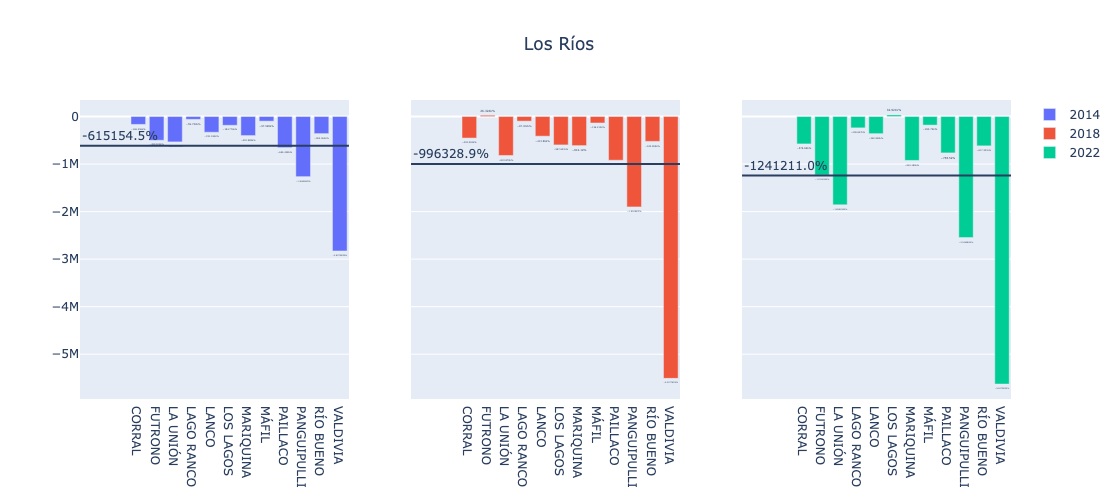

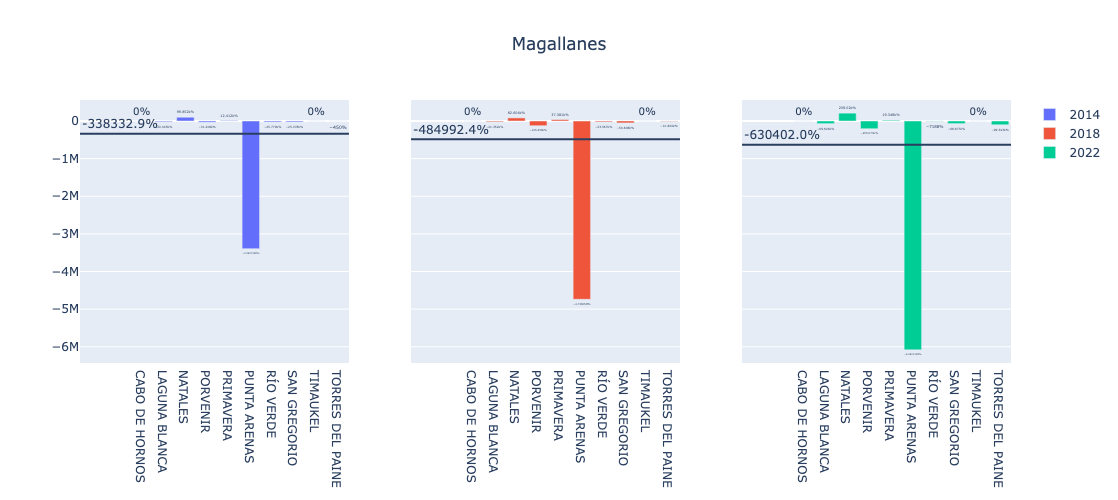

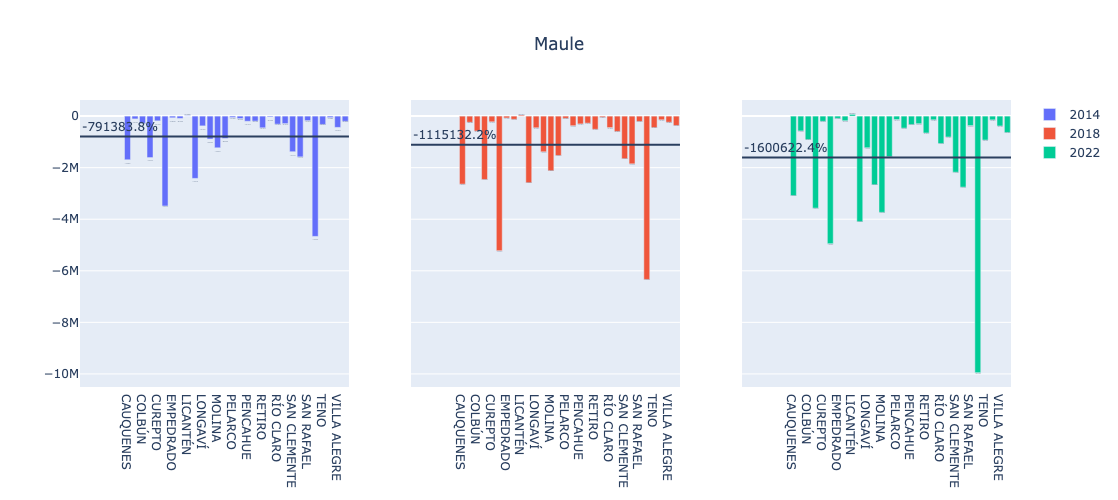

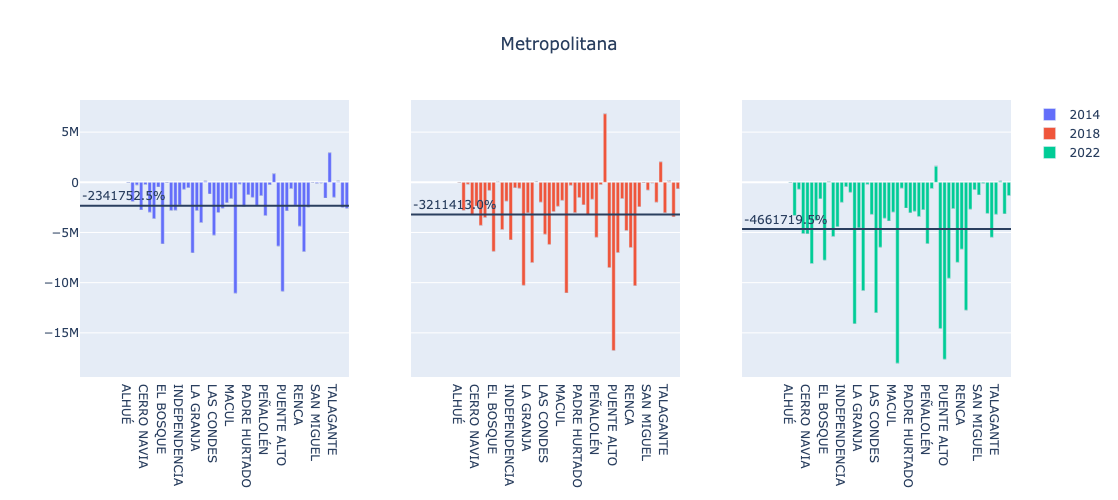

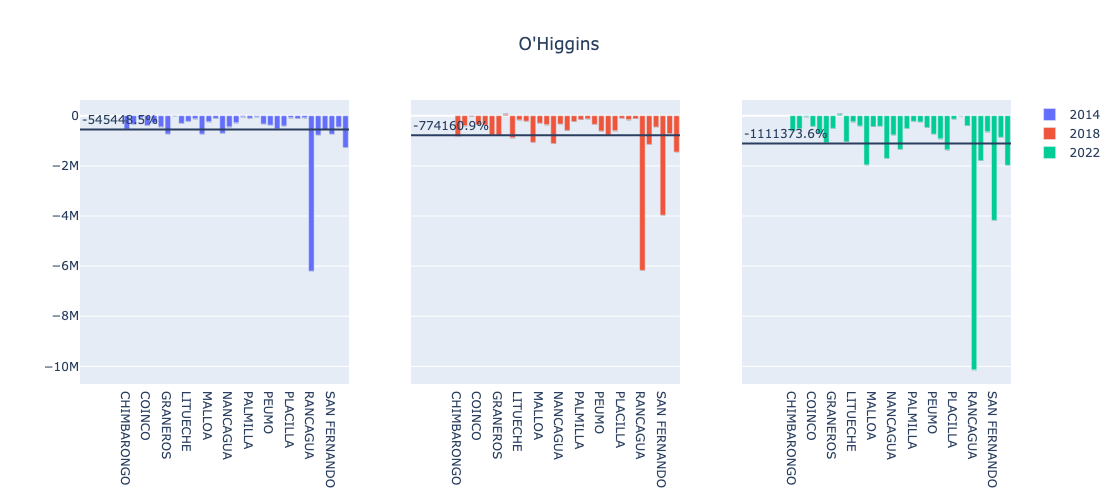

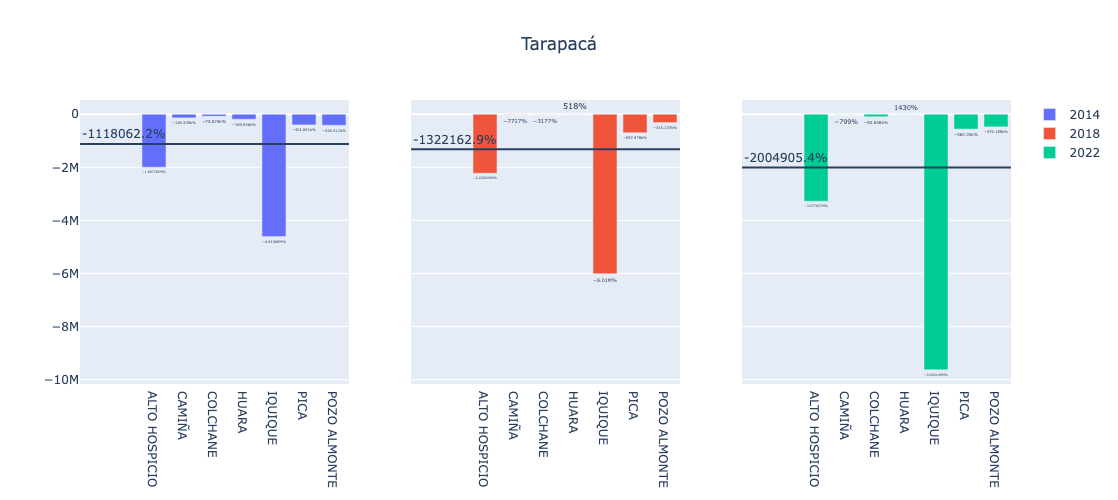

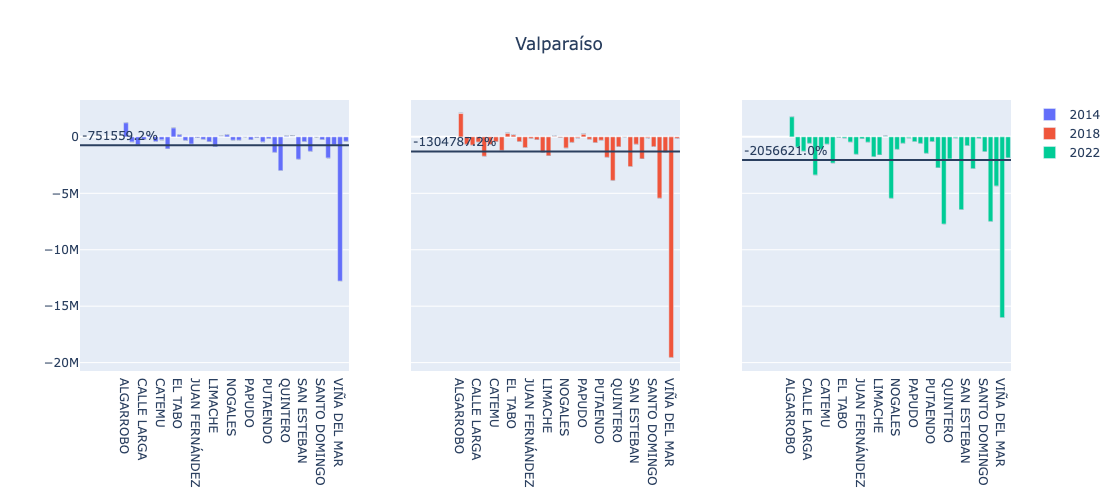

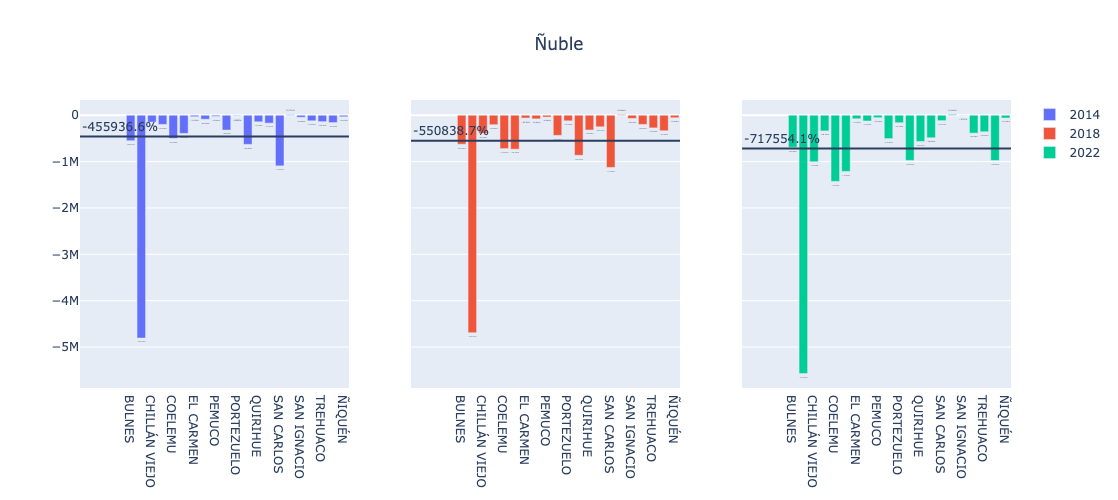

In [16]:
regions = df_group_comuna.reset_index()["Region"].unique()
years = [2014, 2018, 2022]
target = "balance_DDAA"
for region in regions: 
    fig = make_subplots(rows=1, cols=len(years), shared_yaxes=True)
    for i, year in enumerate(years):
        promedio_region = df_group_region.loc[(year, region)][target]
        fig.add_trace(go.Bar(name=f"{year}",
                             x=df_group_comuna.loc[(year, region)].reset_index()["Municipio"],
                             y=df_group_comuna.loc[(year, region)].reset_index()[target],
                             text=df_group_comuna.loc[(year, region)].reset_index()[target],
                             textposition="outside",
                             texttemplate="%{y}%"),
                     row=1, col=i+1)
        fig.add_hline(y=promedio_region, row=1, col=i+1)
        fig.add_annotation(x=-1, y=promedio_region,
            text=f"{promedio_region:.1f}%",
            showarrow=False,
            yshift=10, row=1, col=i+1)
        fig.update_layout(title=dict(text=f"{region}", x=0.5, xanchor="center"),
                         height=500)
    fig.show()

# Derechos de Aseo en IPP

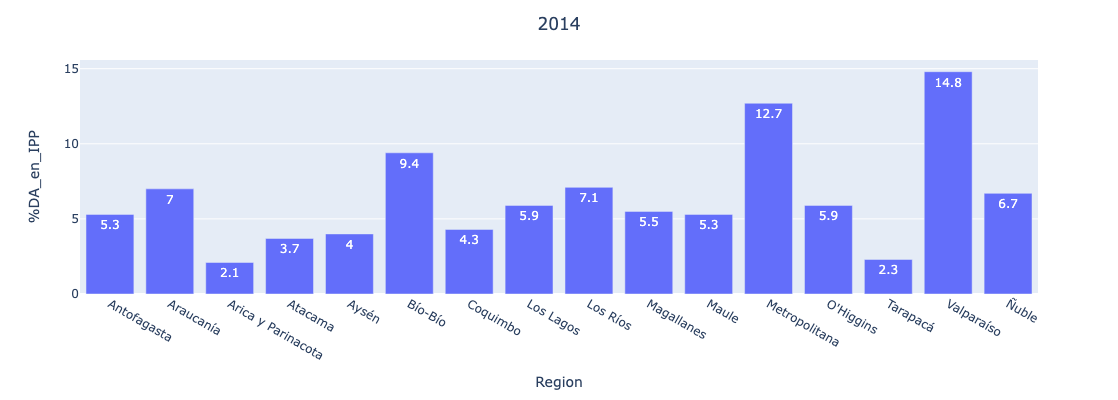

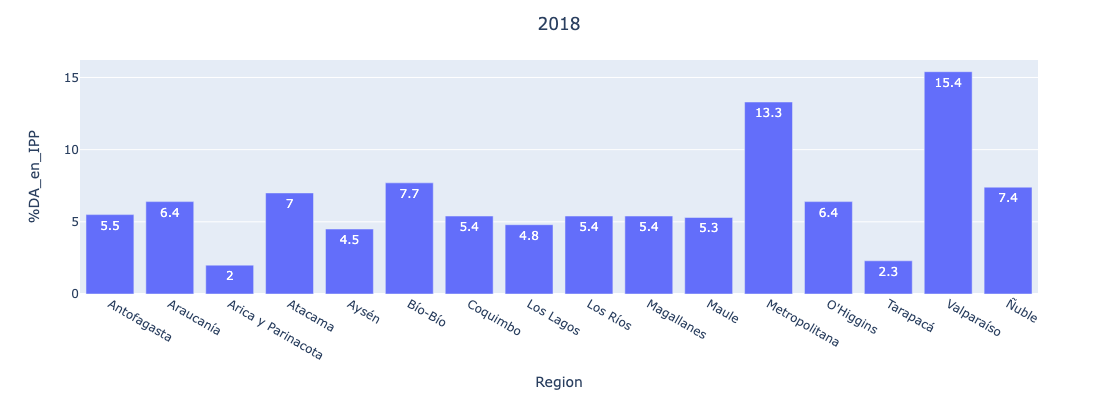

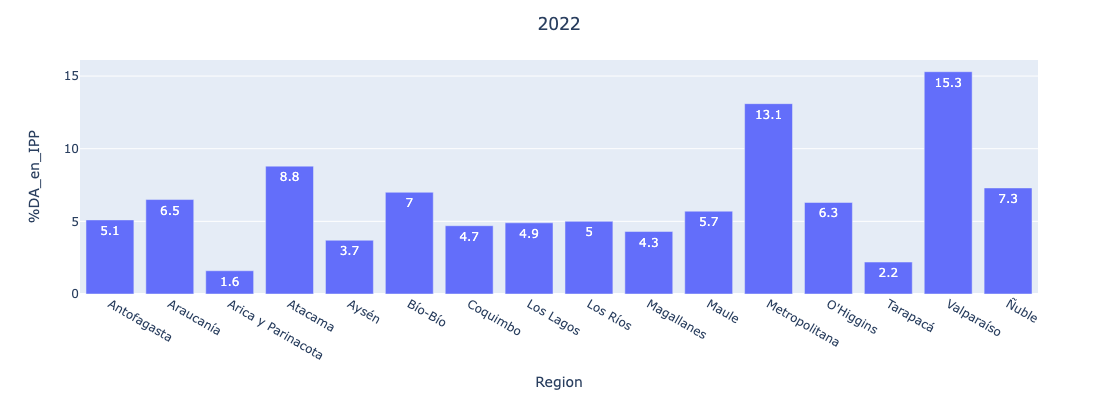

In [7]:
for year in [2014, 2018, 2022]:
    df_to_plot = df_group_region.loc[year].reset_index(drop=False)
    fig = px.bar(df_to_plot, x="Region", y="%DA_en_IPP", text_auto=True)
    fig.update_layout(title=dict(text=f"{year}", x=0.5, xanchor="center"),
                     height=400)
    fig.show()

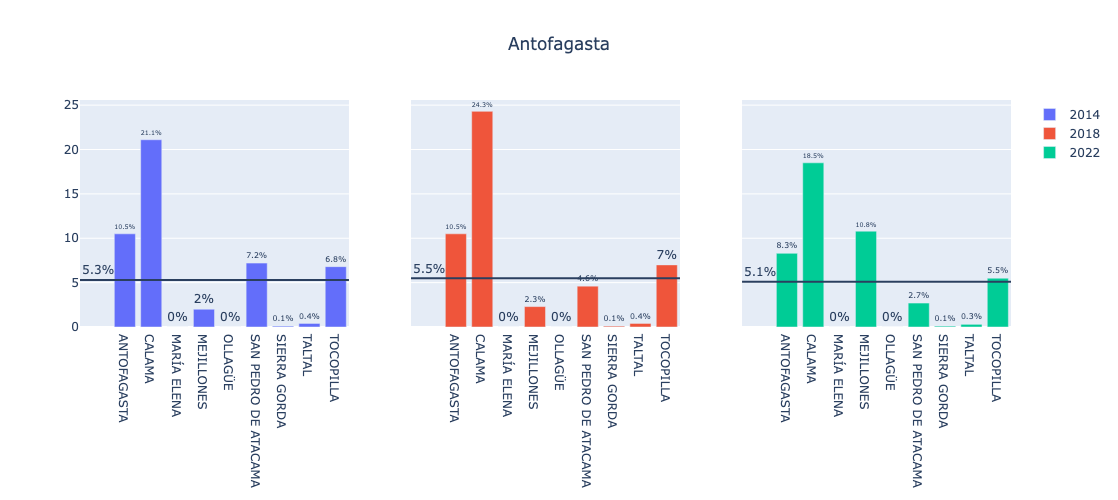

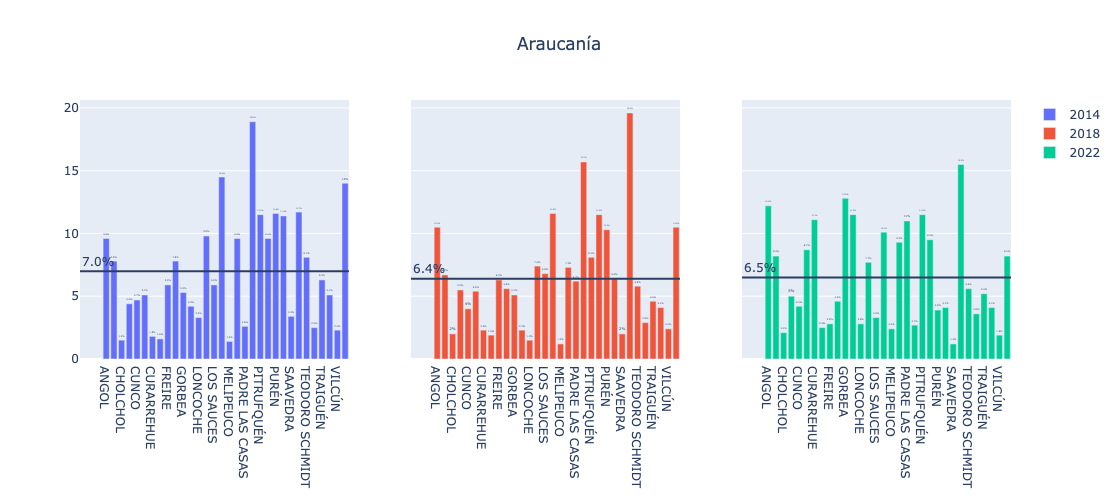

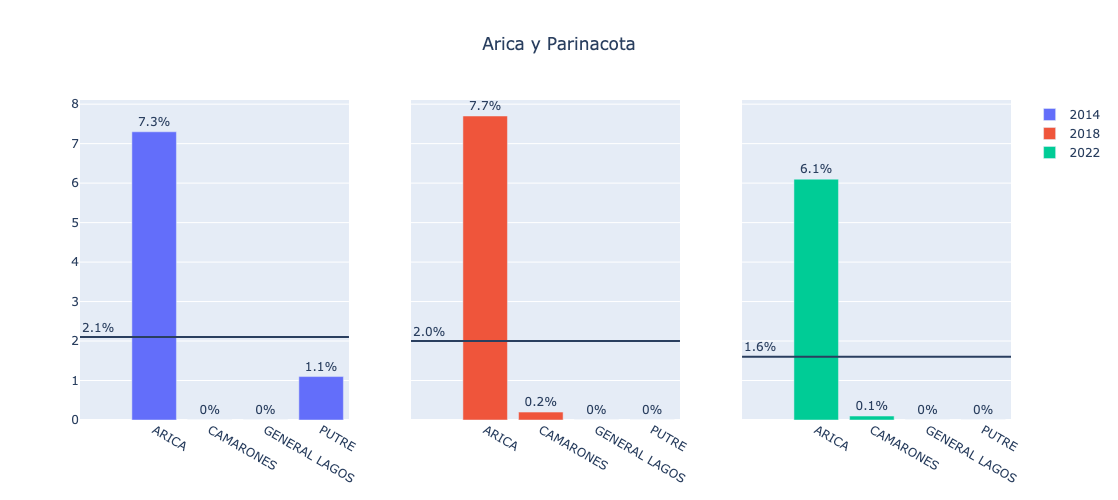

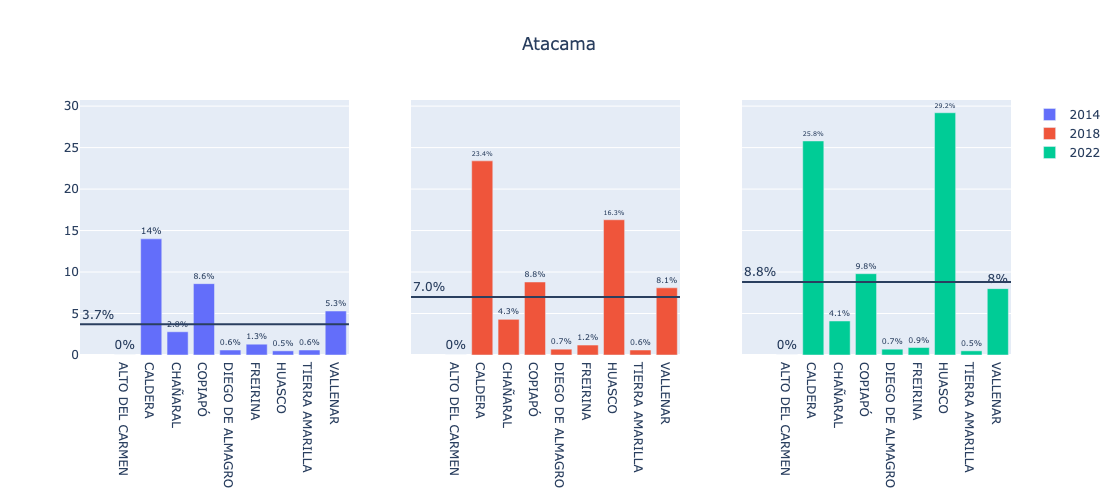

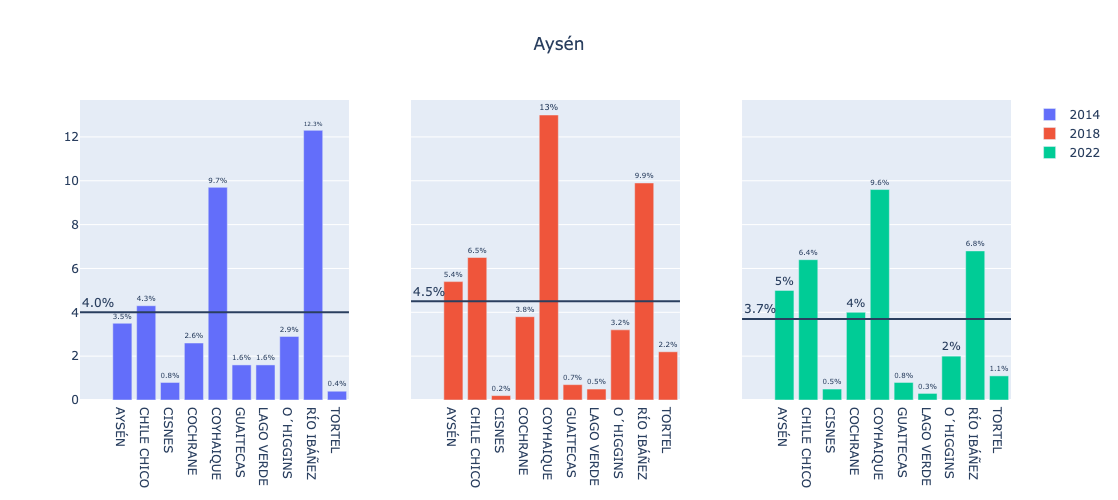

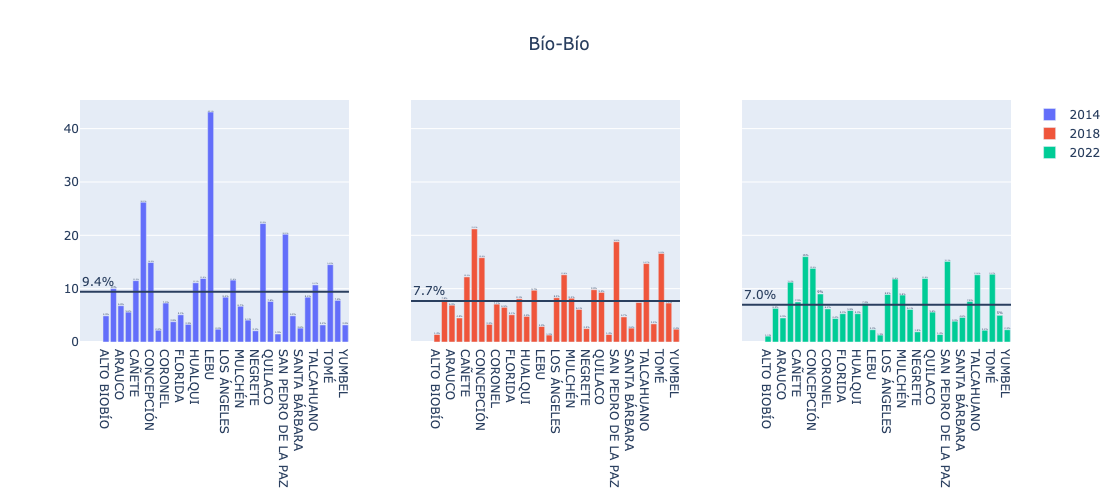

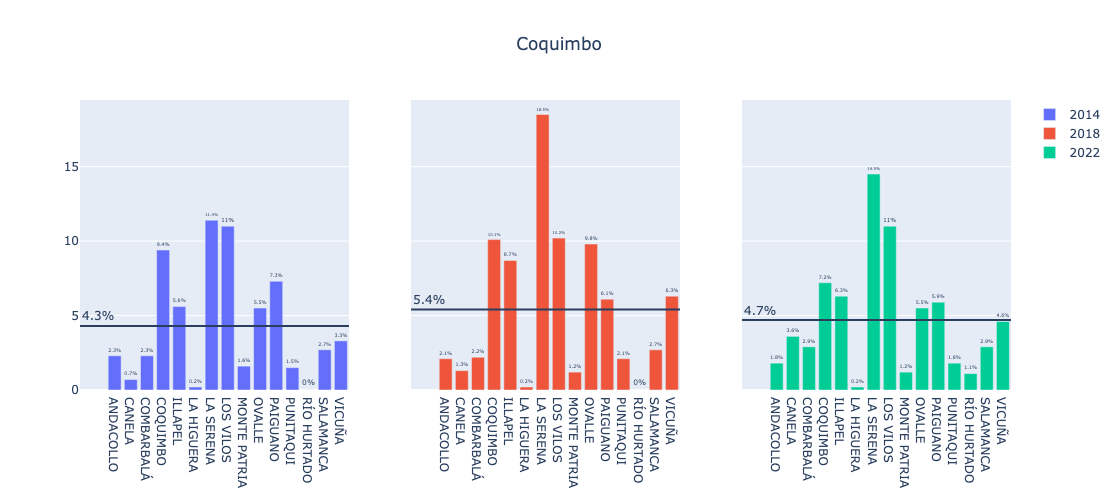

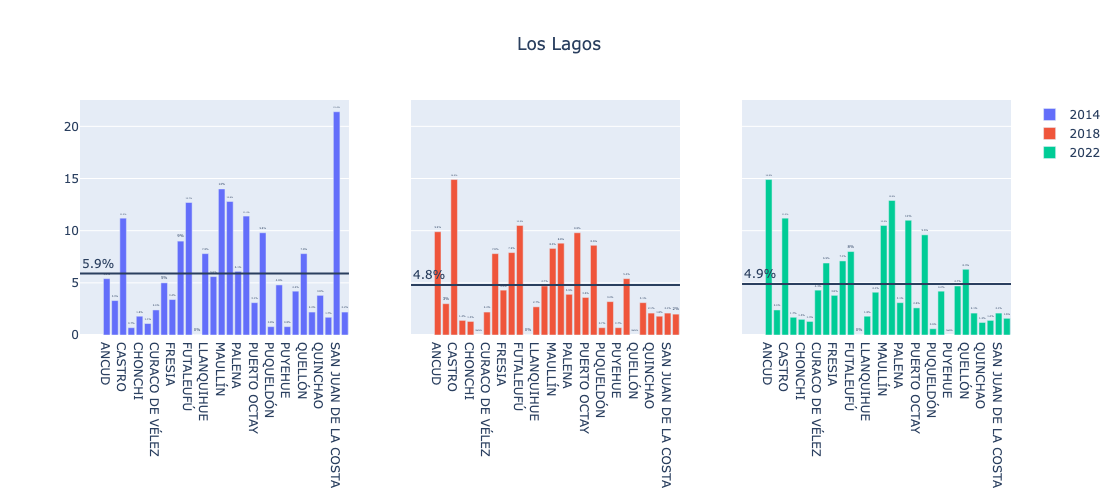

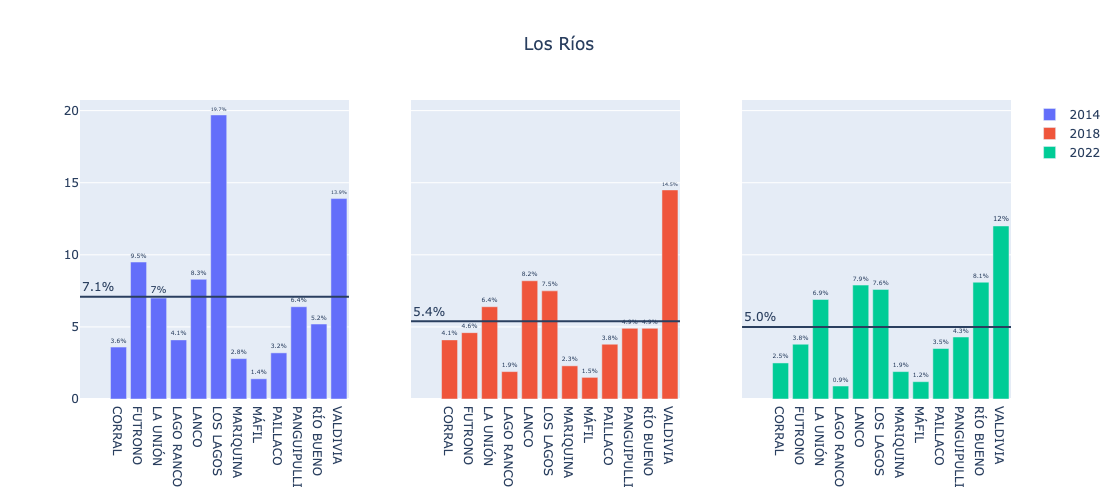

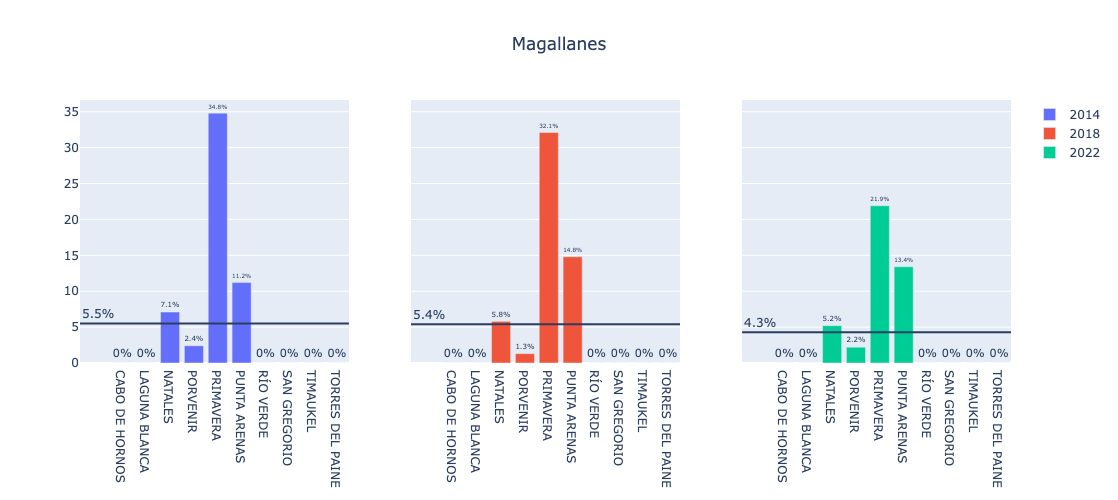

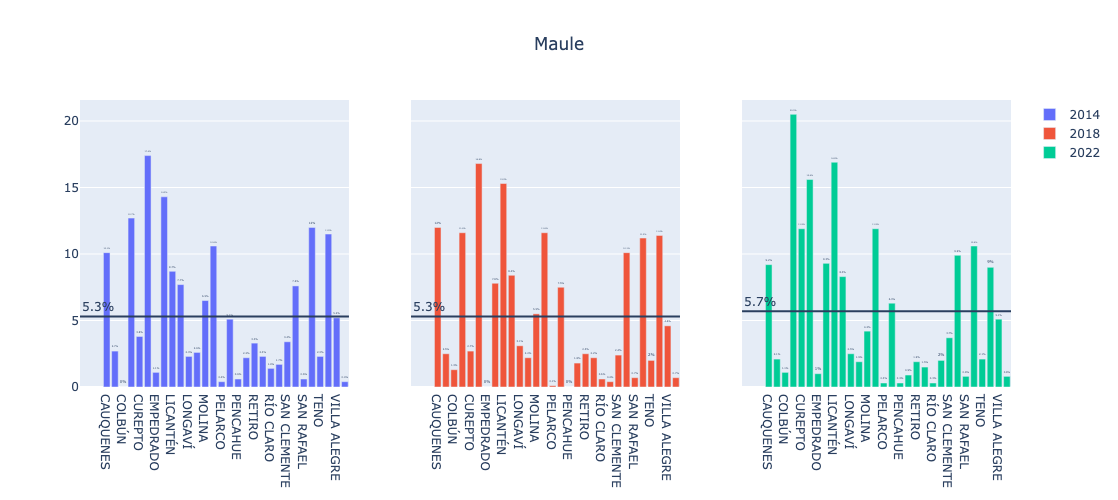

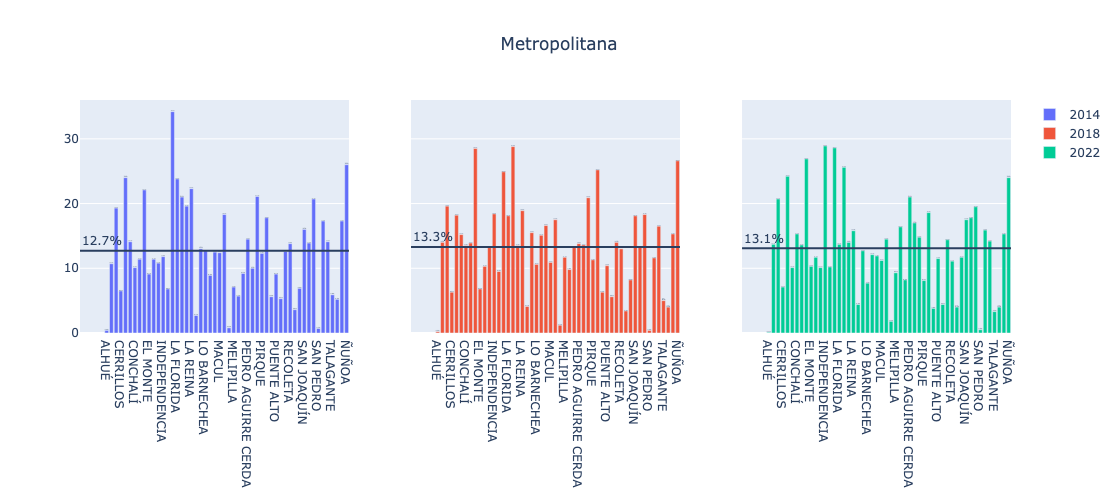

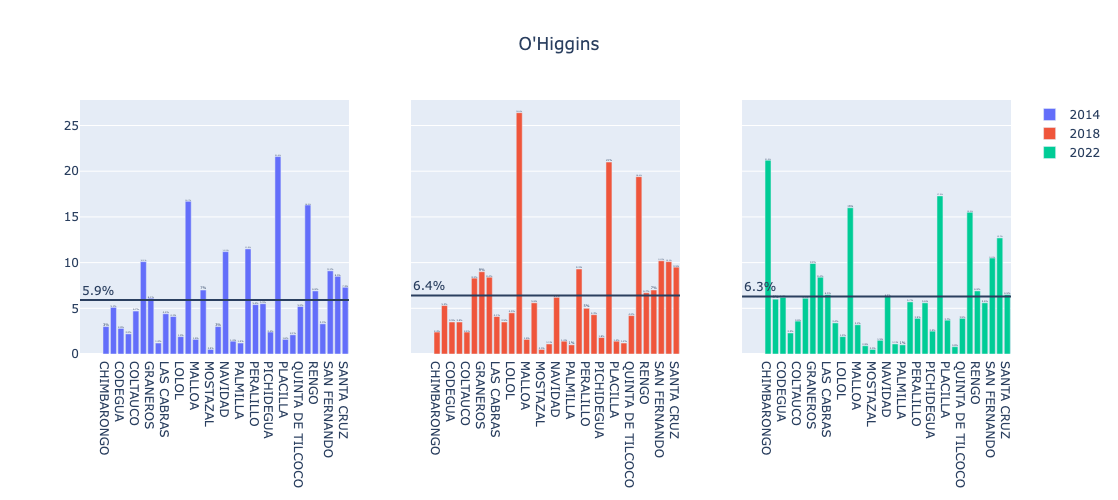

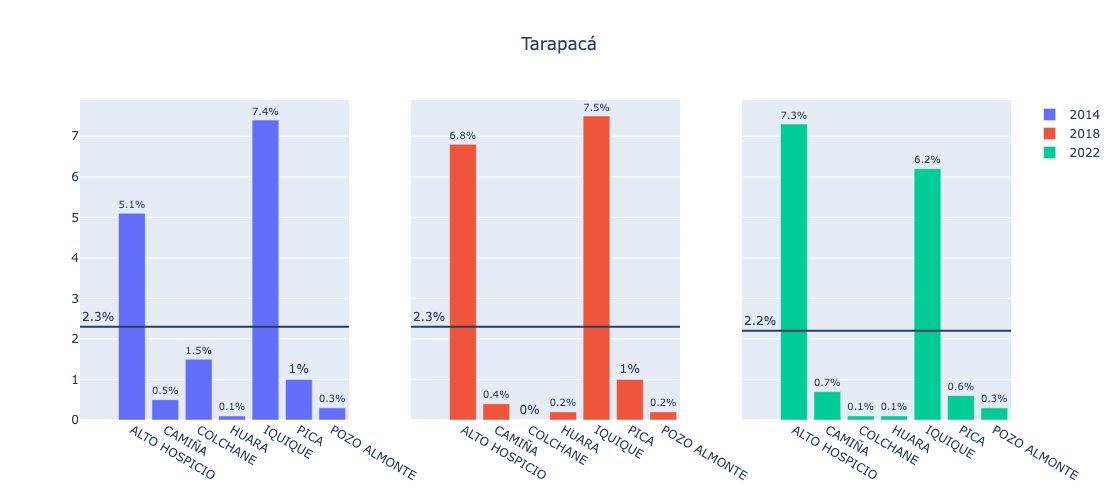

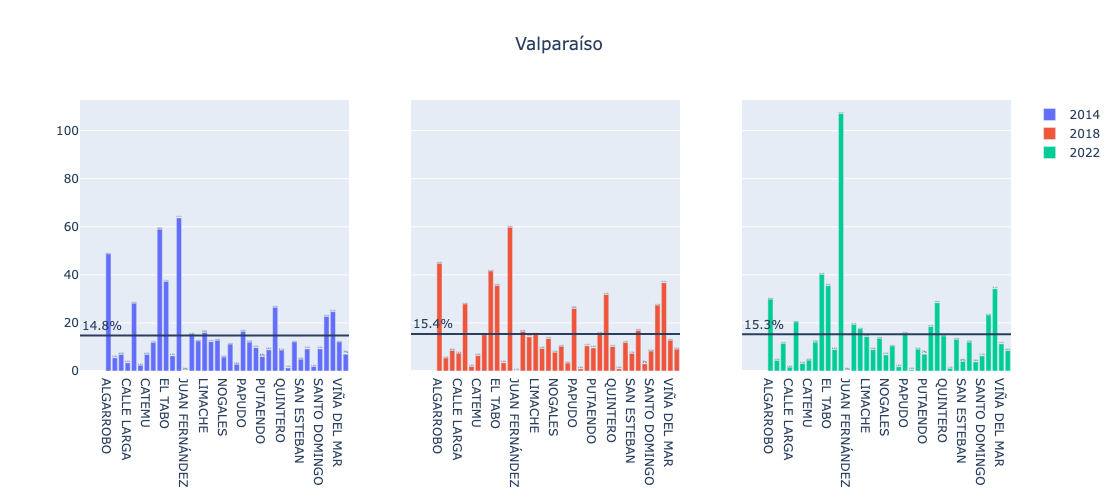

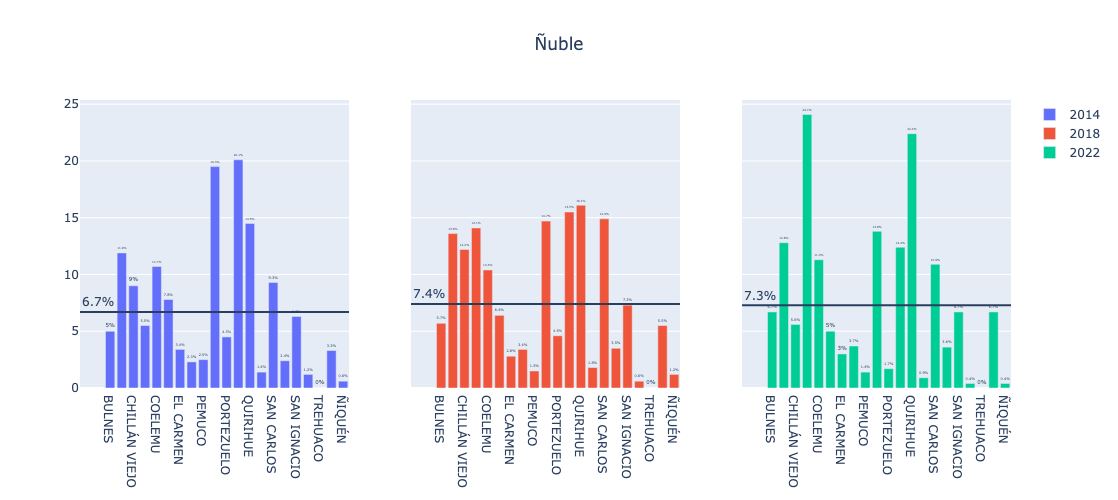

In [9]:
regions = df_group_comuna.reset_index()["Region"].unique()
years = [2014, 2018, 2022]
target = "%DA_en_IPP"
for region in regions: 
    fig = make_subplots(rows=1, cols=len(years), shared_yaxes=True)
    for i, year in enumerate(years):
        promedio_region = df_group_region.loc[(year, region)][target]
        fig.add_trace(go.Bar(name=f"{year}",
                             x=df_group_comuna.loc[(year, region)].reset_index()["Municipio"],
                             y=df_group_comuna.loc[(year, region)].reset_index()[target],
                             text=df_group_comuna.loc[(year, region)].reset_index()[target],
                             textposition="outside",
                             texttemplate="%{y}%"),
                     row=1, col=i+1)
        fig.add_hline(y=promedio_region, row=1, col=i+1)
        fig.add_annotation(x=-1, y=promedio_region,
            text=f"{promedio_region:.1f}%",
            showarrow=False,
            yshift=10, row=1, col=i+1)
        fig.update_layout(title=dict(text=f"{region}", x=0.5, xanchor="center"),
                         height=500)
    fig.show()